# Investigating Data with Python:

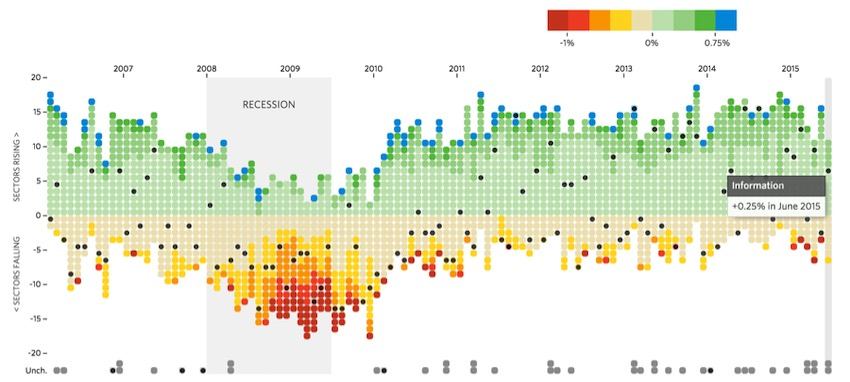

### What is the Iris Dataset?

The Iris Dataset is regarded as one of the most famous datasets available, and is frequently used as a teaching aid due to its versatility and subtle differences within the data that make it an interesting model for studying pattern recognition. 

The dataset contains 3 classes, with 50 instances of each. Each class refers to a different species type of the Iris plant, and various measurements (namely length & width of both petal & sepal, in cm) were recorded for each.

The idea behind investigating the dataset is to recognise definitive patterns that are uniquely respective to each class, and thus to be able to predict the class based on given information about a new plant who’s species has not been defined yet. We can also use the information available to garner further insights into the nature of the plants using a variety of techniques that are commonly used in DA.

One term often used in DA is regression. There are many forms of regression, but the simplest one is probably linear regression. Imagine having a hundred dots on a graph. Linear regression would be the act of finding the line that passes through all of these with the minimum total distance between it and each dot. In other words, the line would be a mean of the placement of the dots on the graph. Now based on the positioning of a new dot in relation to this line, we can sometimes, if the data follows a linear pattern, make a pretty good guess as to whether the new dot is of the same ilk as the others, or is of another class due to its distance from the line.

This form of data analysis works really well for isolating one of the classes in this dataset, and as a result we can quite confidently separate one class from the others using this technique. However, this is where things start to get tricky. The Iris data set has a hidden caveat when trying to separate its classes with confidence. As shown, when we view the data we can see one class clearly separated from the other two, however for the others there is quite a bit of crossover in terms of their data. For the outliers at the extremes of each of the two classes we can make a relatively confident guess as to which class a sample is, however, at the junction point where the two crossover  the water becomes muddied, and thus we must find a more sophisticated approach to separating our samples into classes. 

There are a myriad of techniques that have been used on this dataset, with various degrees of success. Here I will endeavour to cover as many of these techniques as possible, and to try and explore the pros and cons of each method as we go.

### Let's Begin:

In [1]:
# Import everything you will need:

import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

First let's import our data set in the form of a CSV (Comma Separated Values) file. Here we can already see the power of pandas straight away as it displays the csv file in a much more visually digestibe format.

We can also see that pandas has assigned its own unique key to the rows.

In [4]:
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Next we can use the power of 'Seaborn', a facet library of the Matplotlib module which can be used for making more effective statistical graphics, helping us to further explore and understand the data.

After some research I have found a very useful form of plotting called a pairplot. This gives a cross-referenced visualisation of each numerical value of a datset against each other. This gives us an incredible overview of the entire dataset as a whole, and grants us a birds-eye vantage point of the relationships between each variable and the next. 

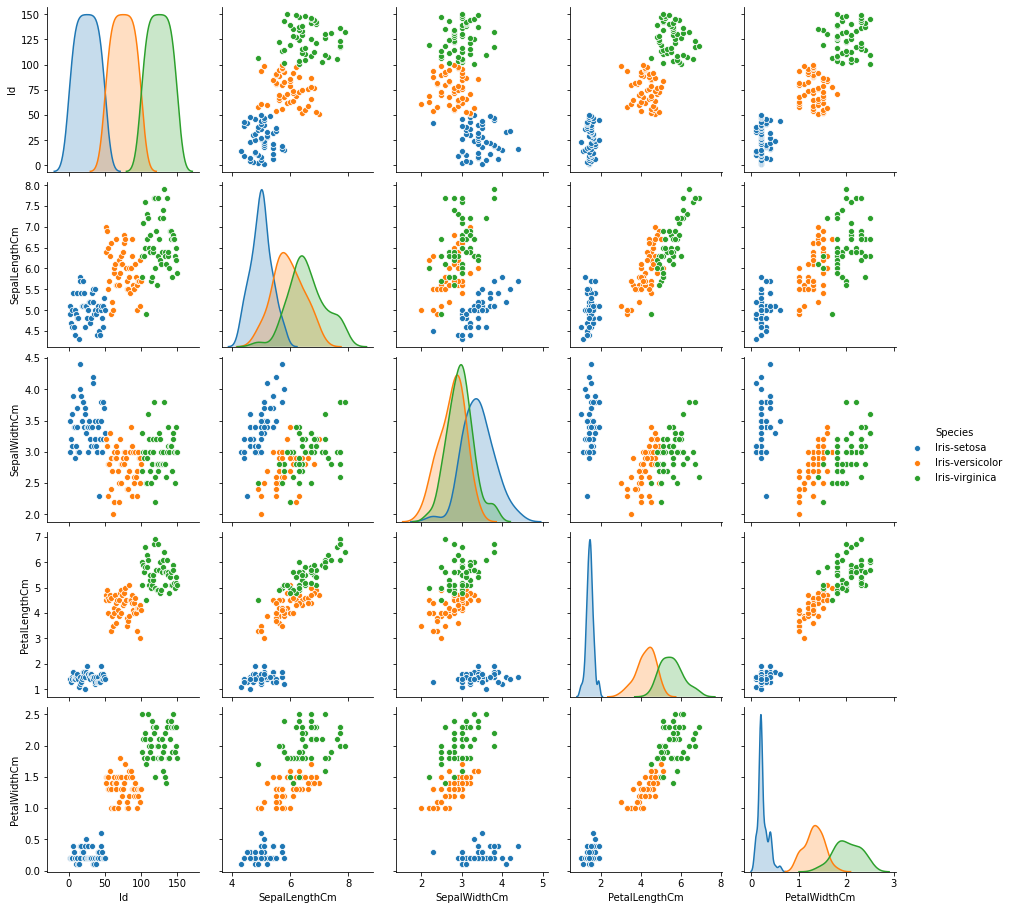

In [5]:
sns.pairplot(df, hue='Species')

Now suddenly we can see the data come to life! By using the hue=Species function in Seaborn, we are able to apply colors to the samples according to their class. Now straight away we can see that there is one class of Iris that differs dramatically from the other two in term of size, but we still have two that are entangled in a state of crossover that makes separating them according to their kind impossible. Yes we can see the separation now with the known classes being assigned colors, but what if we were given a new, unknown sample somewhere in the middle of both of them? How could we then differentiate between the two? This is the real challenge of this dataset.

#### Approach:

So how could we approach this problem? After all, in the above representation there doesn't seem to be any definitive place to draw a line between the two. What may serve as a helpful bouyancy aid for the coming concepts regarding dimensions is this fact: All of the above viewpoints are 2 dimensional. But look at the dataset; we have 4 different variables, thus we are dealing with a 4 dimensional dataset!

Without going too deep into the implications of dimensional magnitudes in the real world, it does help to think of the separation of data such as this in the following way. In 2 dimensions, two circles will always look like they cross over if they pass over the same space on the x and y axis. However, in 3 Dimensional space, 2 spheres could both cross the same points on the x and y axis, but never touch, as they are at different ends of a room. Furthermore regarding the 4th Dimension, the balls could pass through the same space, but at different times. But I digress... The main thing is to know that just because two of a number of dimensionsare shared by a sample, it doesn't mean that others are. And in data analytics, there could be infinite dimensions to take into account. This is where the limits of the human brain's understanding of dimensions can start to get  spread a little thin. Luckily, for a computer, this is just another walk in the infinite interdimesnional-park that is computing. So, the smart thing to do would be to find a way of getting the machine to do the work for us. Thus, we invented machine learning! And using this technique, if we can figure out a place within these several dimensions to draw a line, we (or moreso the machine) will have solved the problem. 

### Exploration:

So firstly perhaps it would help to isolate each collumn and see if we can see if we can gain any information from them individually:

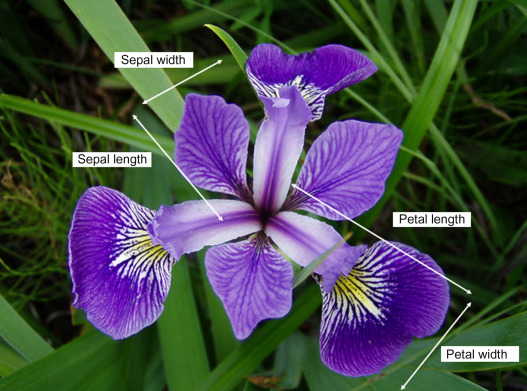

### Sepal Length

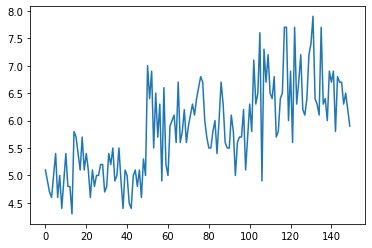

In [41]:
plt.plot(df.SepalLengthCm);

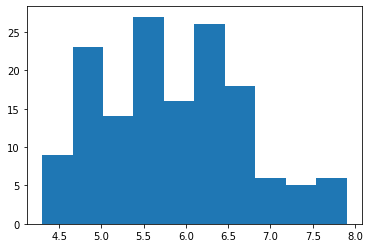

In [40]:
plt.hist(df.SepalLengthCm);

### Sepal Width

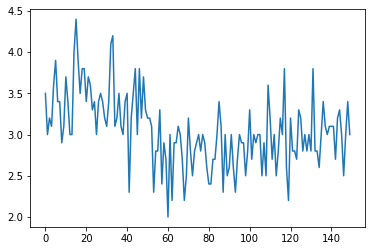

In [39]:
plt.plot(df.SepalWidthCm);

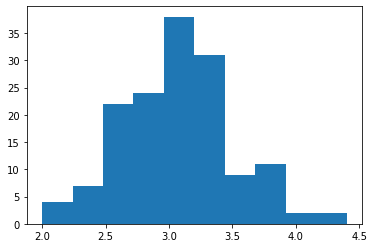

In [38]:
plt.hist(df.SepalWidthCm);

### Petal Length

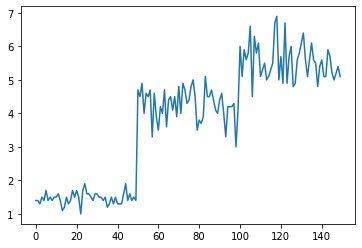

In [37]:
plt.plot(df.PetalLengthCm);

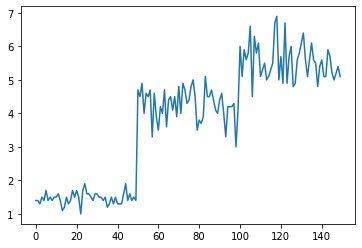

In [36]:
plt.plot(df.PetalLengthCm);

### Petal Width

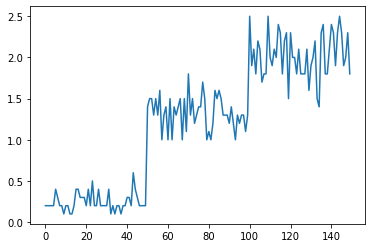

In [34]:
plt.plot(df.PetalWidthCm);

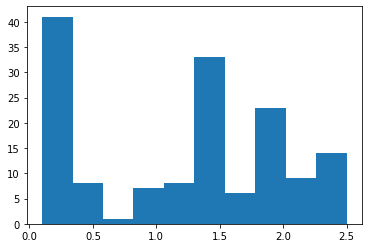

In [35]:
plt.hist(df.PetalWidthCm);

From looking at the above plots, it seems to me that petal Length and width seem to both have three distinct groups separated by space on the plot. I t is hard to say for sure, but it looks like we may have spotted an area of distinction between the other two variants.

## Machine Learning:

Since we have complete data with species included, we can 'train' the machine based on the given data. This is called 'supervised learning' in machine learning. 

In oppposition, unsupervised learning would be if we had the data, but not the species, and thus had to try and figure out which was which from in incomplete basis-model. In this case we would atempt to cluster the samples into meaningful groups based on the data given. 


### Load Iris dataset into SKLearn:

Funnily enough, after searching for and importing the csv file aboe, I have now found that this dataset is so popular it is actually built into the Python Machine Learning Module; SciKitLearn, which we will be using now to investigate this dataset. From here I will be using the built in data set.

In [2]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

In [3]:
# save "bunch" object (Container object exposing keys as attributes)
# containing iris dataset and all its attributes:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [5]:
# print iris data
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.